         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-24  435.751007  436.112000  421.131989  423.204987  423.204987   
1  2014-09-25  423.156006  423.519989  409.467987  411.574005  411.574005   
2  2014-09-26  411.428986  414.937988  400.009003  404.424988  404.424988   
3  2014-09-27  403.556000  406.622986  397.372009  399.519989  399.519989   
4  2014-09-28  399.471008  401.016998  374.332001  377.181000  377.181000   

     Volume  
0  30627700  
1  26814400  
2  21460800  
3  15029300  
4  23613300  
(3602, 7)
               Open          High           Low         Close     Adj Close  \
count   3602.000000   3602.000000   3602.000000   3602.000000   3602.000000   
mean   17325.977765  17719.758181  16904.761312  17341.426323  17341.426323   
std    19193.437008  19622.890459  18720.044484  19202.733193  19202.733193   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%     1121.940033   1161.432526   1101.150024 

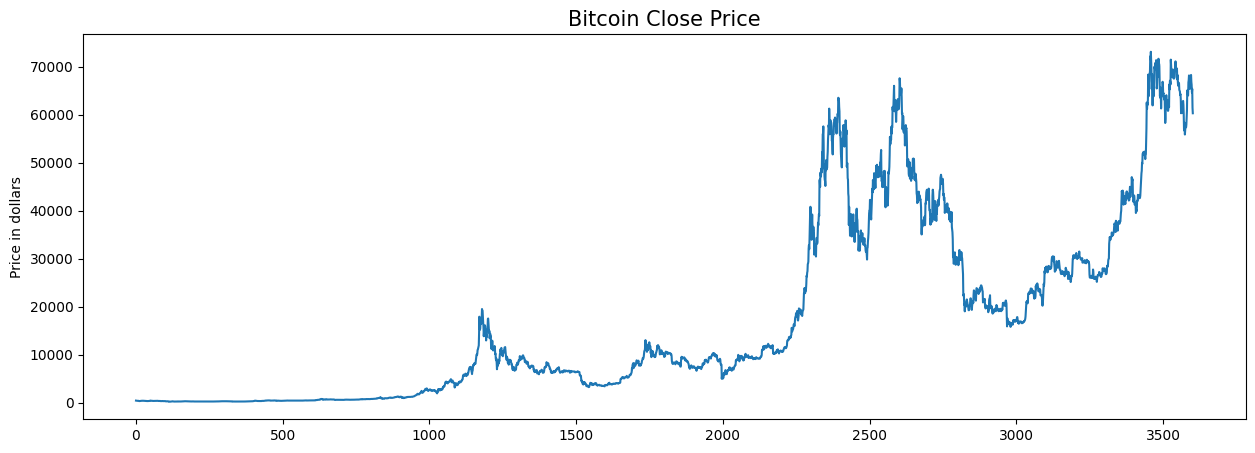

Check if data is null:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


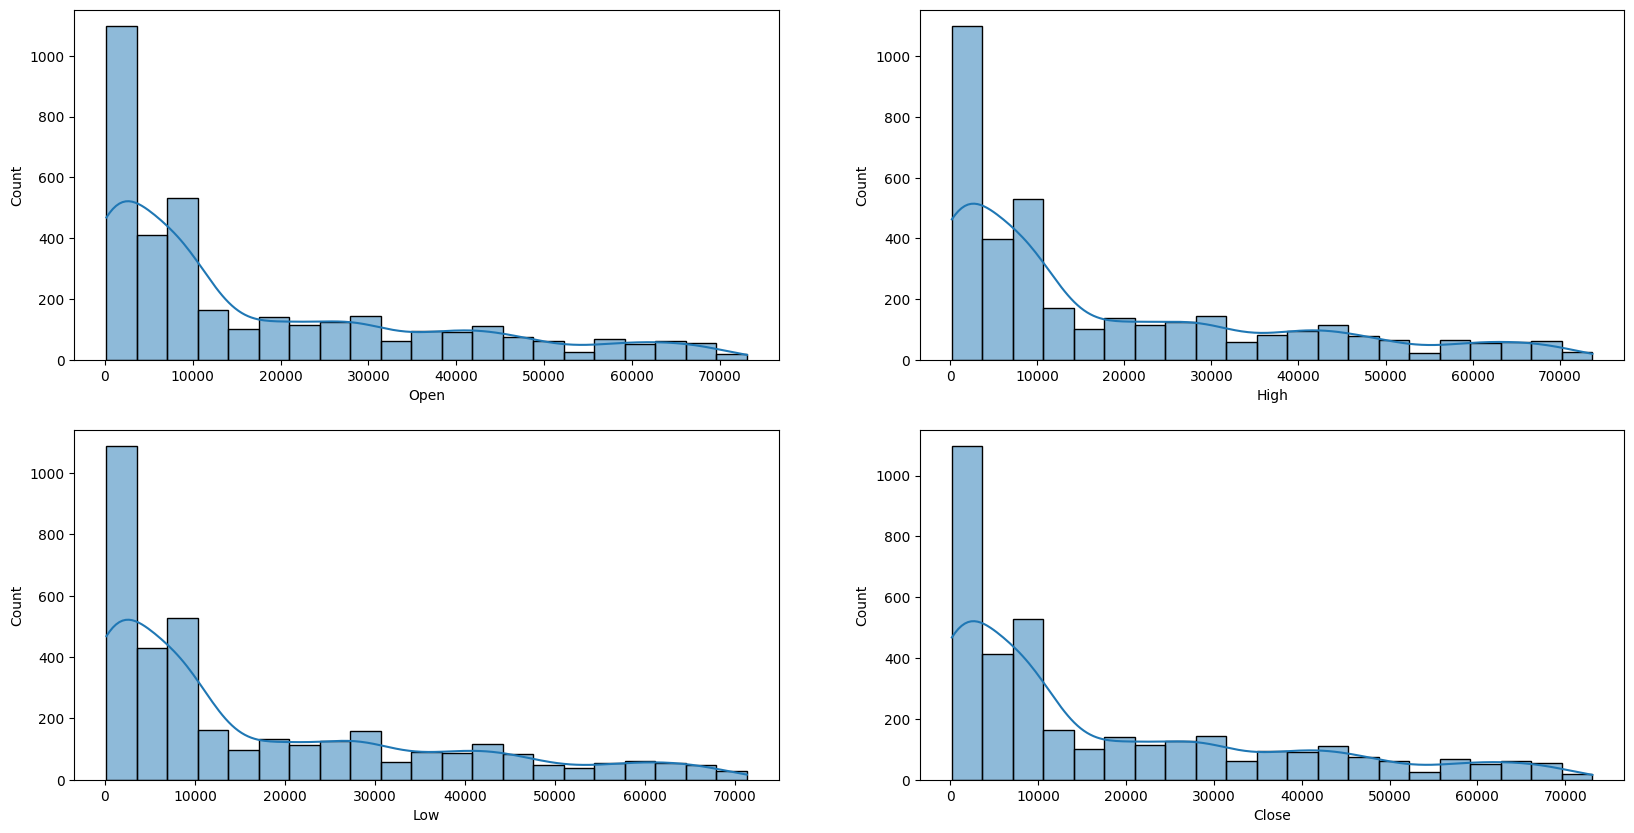

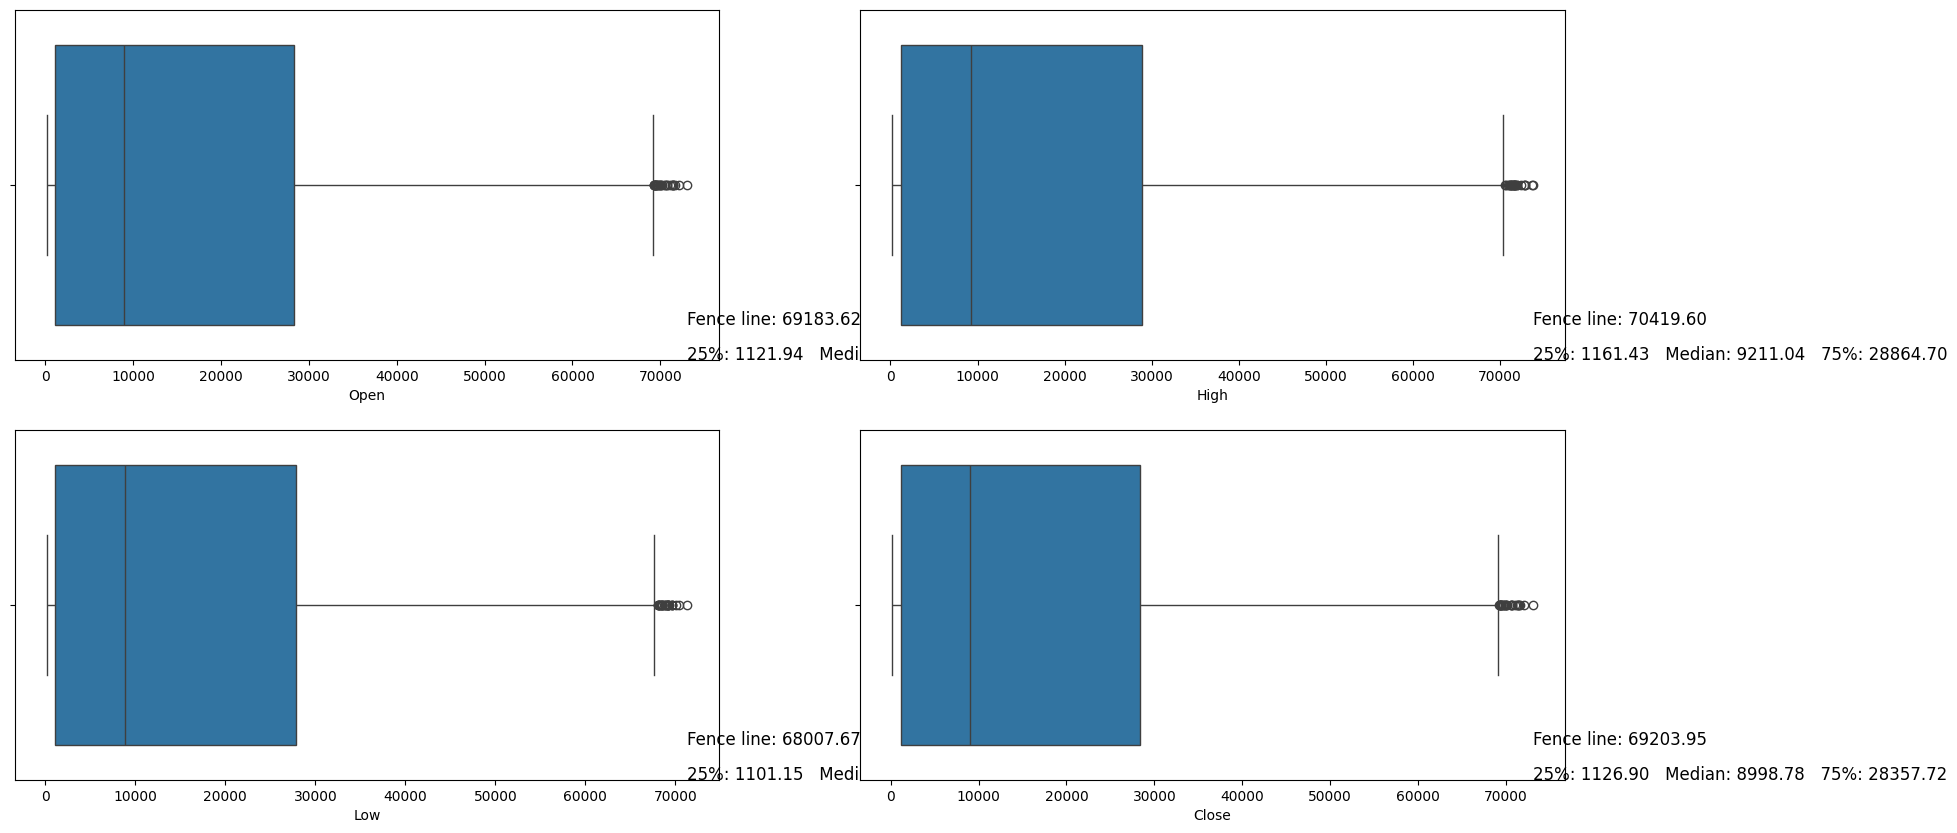

         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-24  435.751007  436.112000  421.131989  423.204987  423.204987   
1  2014-09-25  423.156006  423.519989  409.467987  411.574005  411.574005   
2  2014-09-26  411.428986  414.937988  400.009003  404.424988  404.424988   
3  2014-09-27  403.556000  406.622986  397.372009  399.519989  399.519989   
4  2014-09-28  399.471008  401.016998  374.332001  377.181000  377.181000   

     Volume  year  month  day  
0  30627700  2014      9   24  
1  26814400  2014      9   25  
2  21460800  2014      9   26  
3  15029300  2014      9   27  
4  23613300  2014      9   28  


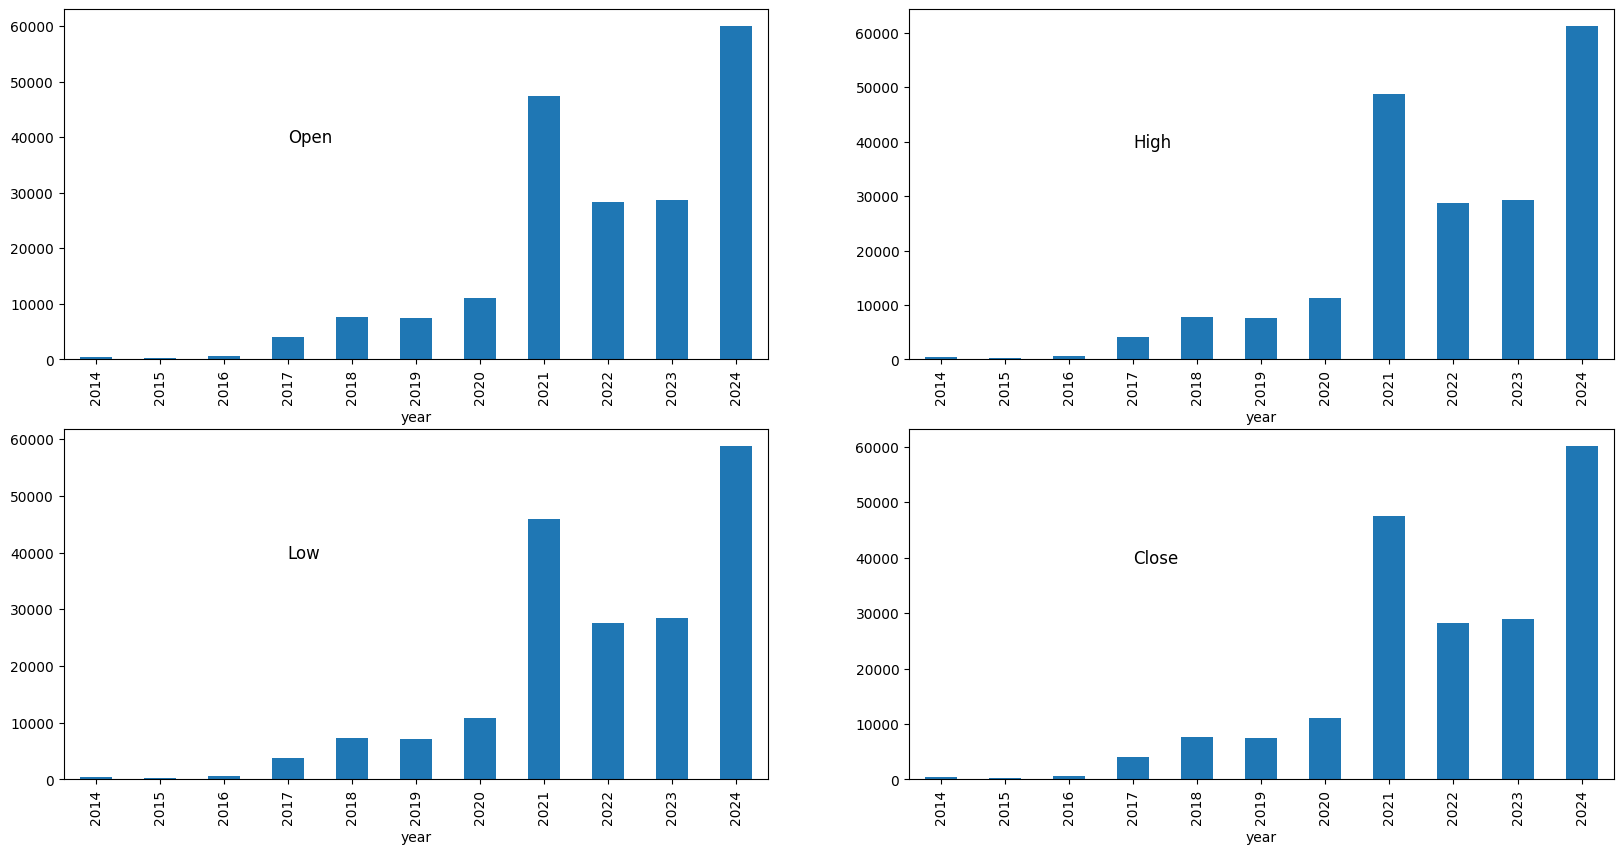

         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-24  435.751007  436.112000  421.131989  423.204987  423.204987   
1  2014-09-25  423.156006  423.519989  409.467987  411.574005  411.574005   
2  2014-09-26  411.428986  414.937988  400.009003  404.424988  404.424988   
3  2014-09-27  403.556000  406.622986  397.372009  399.519989  399.519989   
4  2014-09-28  399.471008  401.016998  374.332001  377.181000  377.181000   

     Volume  year  month  day  is_quarter_end  
0  30627700  2014      9   24               1  
1  26814400  2014      9   25               1  
2  21460800  2014      9   26               1  
3  15029300  2014      9   27               1  
4  23613300  2014      9   28               1  


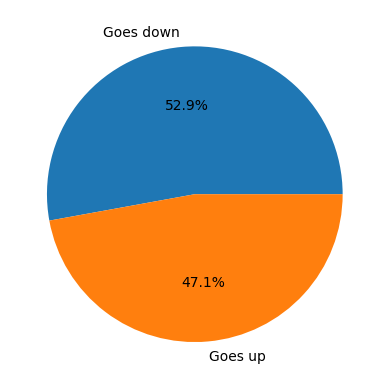

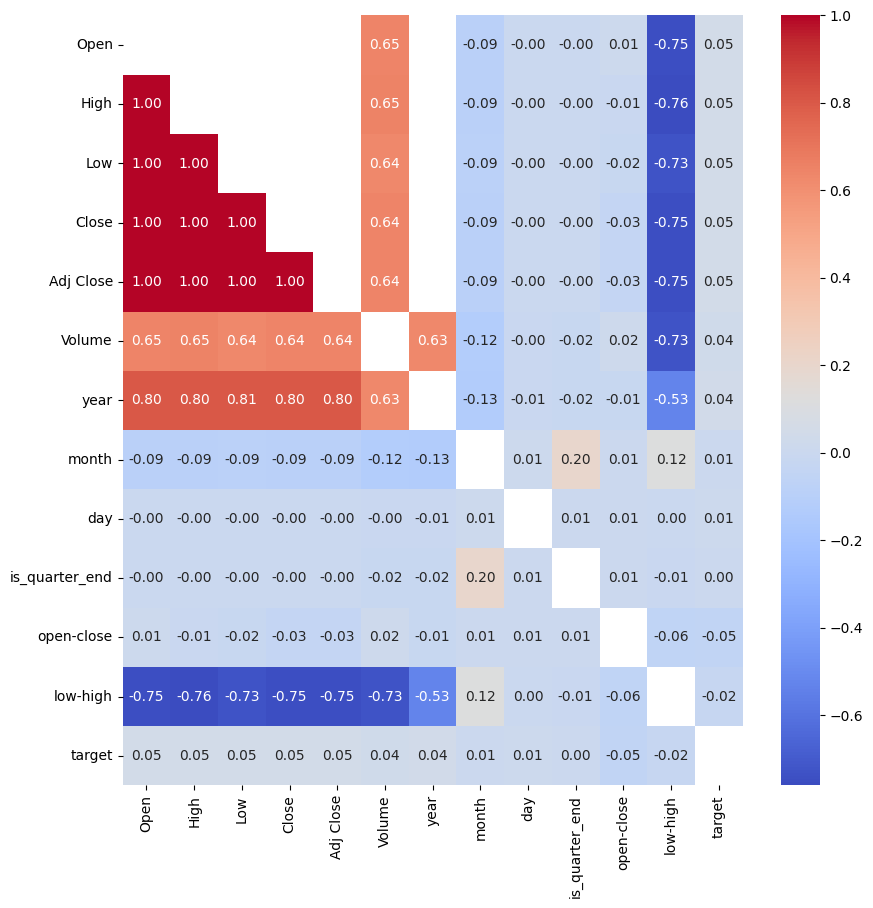

(3241, 3) (361, 3)
LogisticRegression :
Training Accuracy: 0.5328524735818466
Validation Accuracy: 0.5365142104272539

SVC :
Training Accuracy: 0.5398319878725334
Validation Accuracy: 0.5342869690695777

XGBClassifier :
Training Accuracy: 0.906145331139072
Validation Accuracy: 0.43258673693456307



0: Goes up
1: Goes down


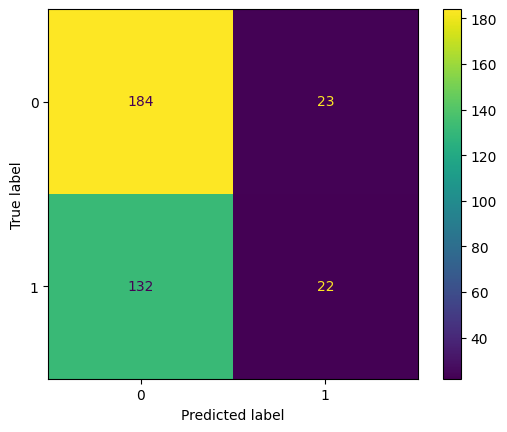

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

# Load data
file_path = "/content/BTC-USD.csv"
df = pd.read_csv(file_path)

# Inspect the data
print(df.head())
print(df.shape)
print(df.describe())
print(df.info())

# Plot Close price over time
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close Price', fontsize=15)
plt.ylabel('Price in dollars')
plt.show()

# Check for null values
print("Check if data is null:")
print(df.isnull().sum())

# Feature distribution plots
features = ['Open', 'High', 'Low', 'Close']

plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sb.histplot(df[col], kde=True)
plt.show()

# Box plots with annotations
plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    ax = sb.boxplot(x=df[col])
    q1, median, q3 = df[col].quantile([0.25, 0.5, 0.75])
    label_text = f"25%: {q1:.2f}   Median: {median:.2f}   75%: {q3:.2f}"
    plt.text(df[col].max(), ax.get_ylim()[0], label_text, fontsize=12)
    IQR = q3 - q1
    k = 1.5  # Adjust this value if needed
    lower_fence = q1 - k * IQR
    upper_fence = q3 + k * IQR
    label_fence = f"Fence line: {upper_fence:.2f}"
    plt.text(df[col].max(), ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.1, label_fence, fontsize=12)
plt.show()

# Feature engineering
splitted = df['Date'].str.split('-', expand=True)
df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

print(df.head())

# Group by year and plot
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
data_grouped = df[numeric_cols].groupby(df['year']).mean()
plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    data_grouped[col].plot.bar()
    dataLabel = f"{col}"
    plt.text(3, 39000, dataLabel, fontsize=12)
plt.show()

# Additional feature engineering
df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)
print(df.head())

df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 0, 1)

# Plot target distribution
plt.pie(df['target'].value_counts().values, labels=["Goes down", "Goes up"], autopct='%1.1f%%')
plt.show()

# Heatmap of correlations
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

# Heatmap of correlations
plt.figure(figsize=(10, 10))

# Create a mask for correlations above 0.8
mask = np.triu(corr_matrix > 0.8)

sb.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.show()

# Prepare features and target
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data
X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

# Train models and evaluate
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for model in models:
    model.fit(X_train, Y_train)
    print(f'{model.__class__.__name__} :')
    print('Training Accuracy:', metrics.roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1]))
    print('Validation Accuracy:', metrics.roc_auc_score(Y_valid, model.predict_proba(X_valid)[:, 1]))
    print()

print('\n\n0: Goes up')
print('1: Goes down')

# Confusion matrix for Logistic Regression
ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()
